In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
!pip install deepface

In [57]:

import numpy as np
from keras.preprocessing import image
from deepface import DeepFace
import cv2
import dlib
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import matplotlib
from skimage import io

In [58]:
img1_path = "/content/drive/MyDrive/1.jpg" #моя фотография
img2_path = "/content/drive/MyDrive/2.jpg" #моя фотография
img3_path = "/content/drive/MyDrive/3.jpg" #моя фотография
img4_path = "/content/drive/MyDrive/4.jpg" #моя собака
img5_path = "/content/drive/MyDrive/5.jpg" #Хью Джекман


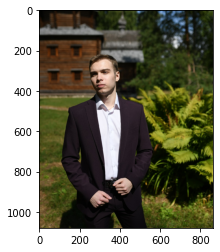

In [59]:
image = cv2.cvtColor(cv2.imread(cv2.os.path.join(img1_path)), cv2.COLOR_BGR2RGB)
imshow(image)

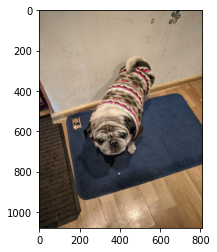

In [60]:
image = cv2.cvtColor(cv2.imread(cv2.os.path.join(img4_path)), cv2.COLOR_BGR2RGB)
imshow(image)

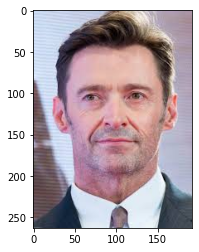

In [61]:
image = cv2.cvtColor(cv2.imread(cv2.os.path.join(img5_path)), cv2.COLOR_BGR2RGB)
imshow(image)

In [62]:
def verify(img1_path, img2_path):
  # Face recognition model:
  model = "VGG-Face"
  # Metric:
  metric = "euclidean"
  # Face Detector:
  backend = 'dlib'

  #face detection and alignment
  detected_face_1 = DeepFace.detectFace(img1_path, detector_backend = backend)
  detected_face_2 = DeepFace.detectFace(img2_path, detector_backend = backend)
  result = DeepFace.verify(img1_path, img2_path, model_name = model, distance_metric = metric, detector_backend = backend)

  data = [img1_path, img2_path]
  plt.figure()
  for i in range(2):
      plt.subplot(1,2,i+1)
      plt.imshow(cv2.cvtColor(cv2.imread(data[i]), cv2.COLOR_BGR2RGB))
  plt.show()
  print("Same person: ", result["verified"]) 
  print("model:", result["model"]) 

In [63]:
def show_face(img1_path, img2_path):
  # Face Detector:
  backend = 'dlib'
  detected_face_1 = DeepFace.detectFace(img1_path, detector_backend = backend)
  detected_face_2 = DeepFace.detectFace(img2_path, detector_backend = backend)
  face = [detected_face_1, detected_face_2]
  plt.figure()
  for i in range(2):
      plt.subplot(1,2,i+1)
      plt.imshow(face[i])
  plt.show()

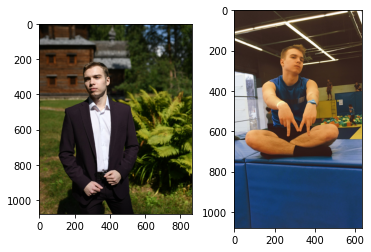

Same person:  True
model: VGG-Face


In [65]:
verify(img1_path,img2_path)



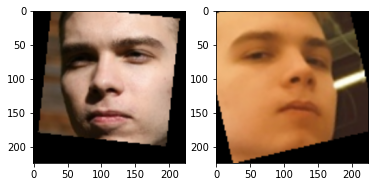

In [66]:
show_face(img1_path, img2_path)

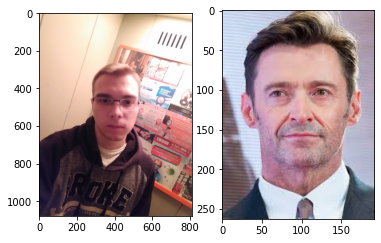

Same person:  False
model: VGG-Face


In [67]:
verify(img3_path,img5_path)




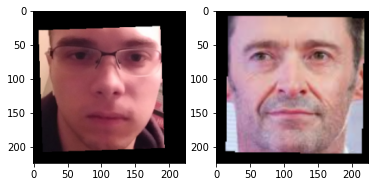

In [68]:
show_face(img3_path, img5_path)

In [70]:
show_face(img1_path, img4_path)


ValueError: ignored

In [71]:
verify(img1_path,img4_path)

ValueError: ignored